In [7]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
def getCoinList():
    req = requests.get('https://www.cryptocompare.com/api/data/coinlist/').json()
    info = req['Data']
    coinList = pd.DataFrame(info)
    coinList = coinList.transpose()
    coinList.to_csv('coinList.csv')
    return coinList

In [9]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df.to_csv(symbol + '.csv')
    return df

In [10]:
def plotChart(axis,df,symbol,comparison_symbol):
    axis.plot(df.timestamp, df.close)
    axis.set_title(symbol + ' Vs ' + comparison_symbol)
    axis.set_ylabel('Price In ' + comparison_symbol)
    axis.set_xlabel('Year')

In [11]:
dfBTC = daily_price_historical('BTC','USD')
dfETH = daily_price_historical('ETH','USD')


In [12]:
dfETH.head()

,close,high,low,open,time,volumefrom,volumeto,timestamp
0,3.00,3.0,0.6747,0.6747,1438905600,123.93,371.79,2015-08-07
1,1.20,3.0,0.1500,3.0000,1438992000,2119.43,1438.16,2015-08-08
2,1.20,1.2,1.2000,1.2000,1439078400,0.00,0.00,2015-08-09
3,1.20,1.2,1.2000,1.2000,1439164800,0.00,0.00,2015-08-10
4,0.99,1.2,0.6504,1.2000,1439251200,9486.09,7419.73,2015-08-11


In [13]:
url = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym=ETH&tsyms=BTC,USD,EUR&ts=1452680400'
page = requests.get(url);
data = page.json()
print(data)

{'ETH': {'BTC': 0.002616, 'USD': 1.13, 'EUR': 1.04}}


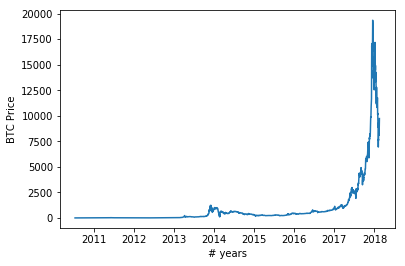

In [14]:
x_data, y_data = (dfBTC["timestamp"].values,dfBTC["close"].values)
x_data_e , y_data_e = (dfETH["timestamp"].values,dfETH["close"].values)
plt.plot(x_data,y_data)
#plt.plot(x_data,y_data_e)
plt.xlabel("# years")
plt.ylabel("BTC Price")
plt.show()

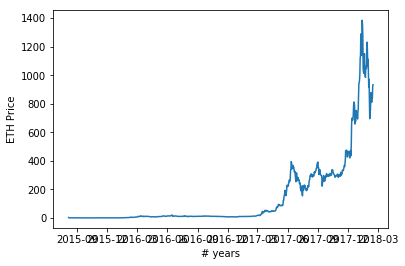

In [15]:
plt.plot(x_data_e,y_data_e)
plt.xlabel("# years")
plt.ylabel("ETH Price")
plt.show()